<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fun_Intro2Stats

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from statsmodels.distributions.empirical_distribution import ECDF # Empirical CDF

In [ ]:
!gdown 1V4c2CDq8SlR0exrGvT2O8nM7lhZYin0T -O "dravid.csv"
!gdown 1V8m3ODI5XEJflp7R19rLv8CU9FKZu1oj -O "sehwag.csv"
!gdown 1V9ZFTiRKzJ8dbdD1JI5nRM1_TEVTRjGS -O "weight-height.csv"

Downloading...
From: https://drive.google.com/uc?id=1V4c2CDq8SlR0exrGvT2O8nM7lhZYin0T
To: /content/dravid.csv
100% 24.2k/24.2k [00:00<00:00, 59.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V8m3ODI5XEJflp7R19rLv8CU9FKZu1oj
To: /content/sehwag.csv
100% 18.6k/18.6k [00:00<00:00, 53.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V9ZFTiRKzJ8dbdD1JI5nRM1_TEVTRjGS
To: /content/weight-height.csv
100% 428k/428k [00:00<00:00, 85.2MB/s]


In [ ]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")


In [ ]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [ ]:
sehwag.shape

(245, 14)

In [ ]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

In [ ]:
p_25 = np.percentile(sehwag["Runs"],25) ## 25th percentile or Q1
p_25

8.0

In [ ]:
p_50 = np.percentile(sehwag["Runs"],50) ## 50th percentile or Q2
p_50

23.0

In [ ]:
p_75 = np.percentile(sehwag["Runs"],75) ## 75th percentile or Q3
p_75

46.0

In [ ]:
iqr = p_75 - p_25
iqr

38.0

<Axes: >

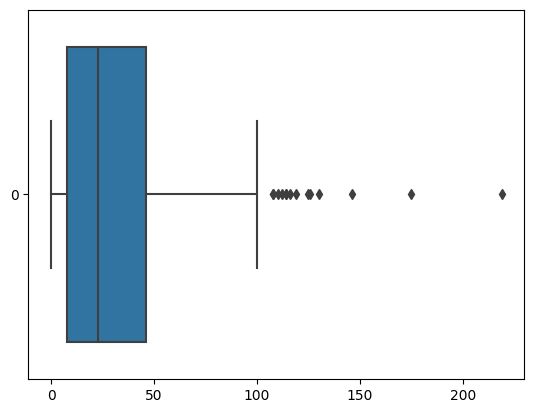

In [ ]:
sns.boxplot(data= sehwag["Runs"], orient="h")

In [ ]:
lower = max(p_25- 1.5*iqr, 0)
lower

0

In [ ]:
upper = p_75 + 1.5*iqr
upper

103.0

In [ ]:
sehwag_outlier = sehwag[sehwag["Runs"]>upper]

In [ ]:
len(sehwag_outlier)

14

In [ ]:
14/245 *100 # percentage of matches where sehwag scores more than 103 runs

5.714285714285714

In [ ]:
dravid

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,3,-,4,0,0,75.00,4,caught,1,NaN,v Sri Lanka,Singapore,3 Apr 1996,ODI # 1089
1,4,-,7,0,0,57.14,4,run out,1,NaN,v Pakistan,Singapore,5 Apr 1996,ODI # 1091
2,3,-,5,0,0,60.00,5,caught,2,NaN,v Pakistan,Sharjah,12 Apr 1996,ODI # 1094
3,11,28,21,0,0,52.38,8,caught,2,NaN,v South Africa,Sharjah,14 Apr 1996,ODI # 1097
4,22,21,15,3,0,146.66,6,not out,1,NaN,v England,Manchester,26 May 1996,ODI # 1104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2,8,6,0,0,33.33,3,caught,1,NaN,v England,Chester-le-Street,3 Sep 2011,ODI # 3186
314,32,50,31,2,0,103.22,3,caught,1,NaN,v England,Southampton,6 Sep 2011,ODI # 3187
315,2,19,11,0,0,18.18,3,run out,1,NaN,v England,The Oval,9 Sep 2011,ODI # 3189
316,19,54,33,3,0,57.57,3,caught,1,NaN,v England,Lord's,11 Sep 2011,ODI # 3191


In [ ]:
dravid["Runs"].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [ ]:
p_25 = dravid["Runs"].quantile(0.25) # Q1 or p_25
p_50 = dravid["Runs"].quantile(0.5)  # Q2 or p_50 or median
p_75 = dravid["Runs"].quantile(0.75) # Q3 or p_75
print(p_25, p_50, p_75)

10.0 26.0 54.0


In [ ]:
min(dravid["Runs"])

0

In [ ]:
iqr = p_75 - p_25 

lower = max(p_25 - 1.5*iqr, 0)

upper = p_75 + 1.5*iqr

print(lower, upper)
print(iqr)

0 120.0
44.0


<Axes: >

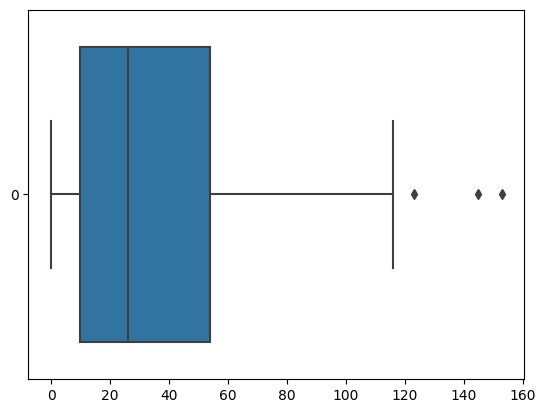

In [ ]:
sns.boxplot(data=dravid["Runs"], orient="h")

In [ ]:
dravid_outlier = dravid[dravid["Runs"] > upper]
len(dravid_outlier)

3

In [ ]:
3/318*100

0.9433962264150944

In [ ]:
# 6% sehwag plays as an outlier
# ~1% dravid is playing as an outlier

In [ ]:
sehwag["Runs"].sample(5)

61      3
30     12
39     13
90     16
102    70
Name: Runs, dtype: int64

In [ ]:
dravid["Runs"].sample(5)

57      3
150    77
254    18
38     42
24     17
Name: Runs, dtype: int64

## Heights

In [ ]:
df_hw = pd.read_csv("weight-height.csv")
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df_hw["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [ ]:
df_height = df_hw["Height"]

In [ ]:
min_height = df_height.min()
min_height

54.2631333250971

In [ ]:
max_height = df_height.max()
max_height

78.9987423463896

In [ ]:
total = len(df_height)

In [ ]:
total

10000

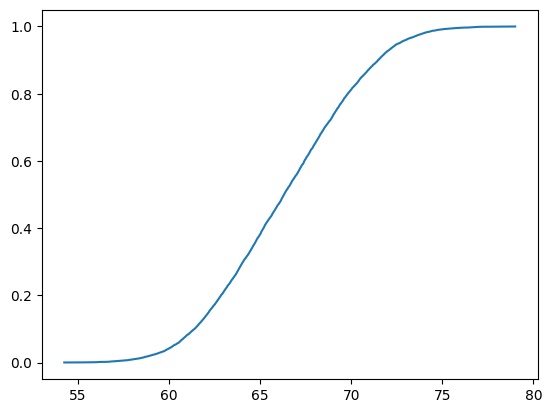

In [ ]:
x_values = np.linspace(min_height, max_height, 1000)
y_values = []

for x in x_values:
    people_shorter_than_x = df_height[df_height<=x]
    
    num_people_shorter_than_x = len(people_shorter_than_x)
    
    frac_people_shorter_than_x = num_people_shorter_than_x/len(df_height)
    
    y_values.append(frac_people_shorter_than_x)
    
plt.plot(x_values, y_values)

In [ ]:
e = ECDF(df_height)

In [ ]:
e.x

array([       -inf, 54.26313333, 54.61685783, ..., 78.52821043,
       78.62137397, 78.99874235])

In [ ]:
e.y

array([0.000e+00, 1.000e-04, 2.000e-04, ..., 9.998e-01, 9.999e-01,
       1.000e+00])

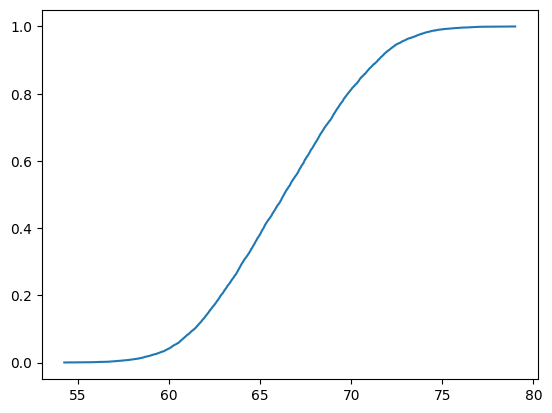

In [ ]:
plt.plot(e.x, e.y)

In [ ]:
df_height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

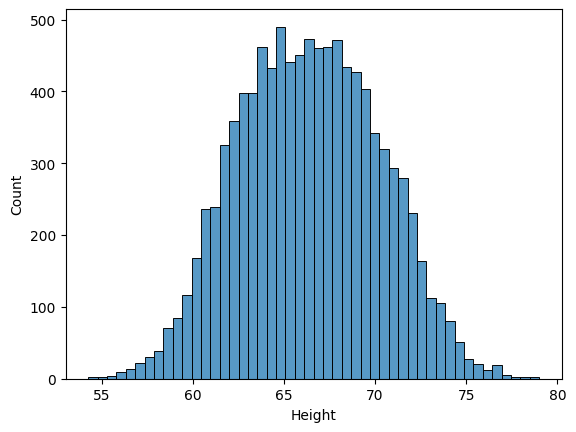

In [ ]:
sns.histplot(df_height)

In [ ]:
df_height.mean()

66.36755975482124

In [ ]:
df_height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [ ]:
np.percentile([10,20,30,40,50,60,70,80,90,100],50)

55.0